In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

## Dimensional Analysis
<p style='text-align: justify;'>To develop an understanding of how initial velocity, acceleration, and time all affect
the distance traveled by an accelerating object, we conduct some experiments and then analyze the resulting data.<br>
We asked a student to conduct a series of tests for us.<br>
She observed 25 **different** moving bodies with a wide range of initial speeds and different accelerations. For each, she measured the distance the bodies traveled for some prescribed time interval.<br><br>
In addition, we would like to use this data set to help make predictions of the distance traveled by other bodies under different conditions. For example, we might want to answer the following question:<br>
* What is the acceleration needed to travel 4800 meters in 200 seconds, if the initial velocity is 8 meters per second?</p><br>
_______________________________________________________________________________________________________________________________


### Loading Data

In [3]:
df = pd.read_excel('Input_Data.xlsx')
#df.style.highlight_max()
#df.round(2)
#df

***
### Plotting test results

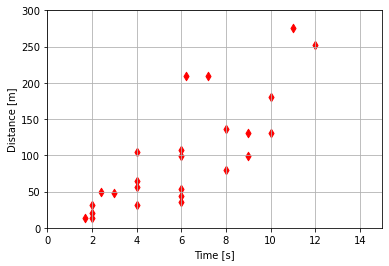

In [4]:
plt.scatter(df["Time"], df["Distance"], c='red', marker='d')
plt.xlabel("Time [s]")
plt.ylabel("Distance [m]")
plt.xlim([0, 15])
plt.ylim([0, 300])
plt.grid()

***
### Dimensionless Groups

In [5]:
df["Vel_Tim/Dis"] = df["Initial_Velocity"] * df["Time"] / df["Distance"]
df["Velsq/Dis_Acc"] = df["Initial_Velocity"] ** 2 / (df["Acceleration"] * df["Distance"])
df.head()

,Test,Initial_Velocity,Acceleration,Time,Distance,Vel_Tim/Dis,Velsq/Dis_Acc
0,1,3.0,1,6.0,36,0.500000,0.250000
1,2,3.0,2,6.0,54,0.333333,0.083333
2,3,1.5,5,6.0,99,0.090909,0.004545
3,4,5.0,4,6.0,44,0.681818,0.142045
4,5,5.0,3,8.0,136,0.294118,0.061275


Text(0.5, 1.0, 'y=11.484805x^3 + -10.795405x^2 + 3.476177x + -0.295564')

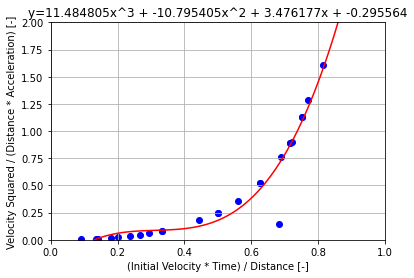

In [6]:
plt.scatter(df["Vel_Tim/Dis"], df["Velsq/Dis_Acc"], c='blue', marker='o')
plt.xlabel("(Initial Velocity * Time) / Distance [-]")
plt.ylabel("Velocity Squared / (Distance * Acceleration) [-]")
plt.xlim([0, 1])
plt.ylim([0, 2])
plt.grid()


trendline = numpy.poly1d(numpy.polyfit(df['Vel_Tim/Dis'], df["Velsq/Dis_Acc"], 3))
abscisa = numpy.linspace(0, 1.0, 100)

plt.plot(abscisa, trendline(abscisa), color='red')
plt.title("y=%.6fx^3 + %.6fx^2 + %.6fx + %.6f"%(trendline[3],trendline[2],trendline[1], trendline[0])) 

***

### Outliers based on trendline

In [40]:
df["Fitting"] = (11.484805 * df["Vel_Tim/Dis"] ** 3 ) + ( -10.795405 * df["Vel_Tim/Dis"] ** 2 ) + ( 3.476177 * df["Vel_Tim/Dis"] ) + -0.295564
df["Difference"] = df["Velsq/Dis_Acc"] - df["Fitting"]
upper_limit = df.Difference.mean() + 3*df.Difference.std()
lower_limit = df.Difference.mean() - 3*df.Difference.std()

outliers = df[(df.Difference > upper_limit) | (df.Difference < lower_limit)]
outliers

,Test,Initial_Velocity,Acceleration,Time,Distance,Vel_Tim/Dis,Velsq/Dis_Acc,Fitting,Difference
3,4,5.0,4,6.0,44,0.681818,0.142045,0.696266,-0.554221


***

### Outlier based on analytical equation

In [48]:
df["CalcDist"] = df["Initial_Velocity"] * df["Time"] + 0.5 * df["Acceleration"] * df["Time"] ** 2
df["Diff"] = (df["Distance"] - df["CalcDist"])

In [49]:
df.Diff.mean()
df.Diff.std()

upper_limit = df.Diff.mean() + 3*df.Diff.std()
lower_limit = df.Diff.mean() - 3*df.Diff.std()

outliers = df[(df.Diff > upper_limit) | (df.Diff < lower_limit)]
outliers

,Test,Initial_Velocity,Acceleration,Time,Distance,Vel_Tim/Dis,Velsq/Dis_Acc,Fitting,Difference,CalcDist,Diff
3,4,5.0,4,6.0,44,0.681818,0.142045,0.696266,-0.554221,102.0,-58.0


***
### Sanity Check

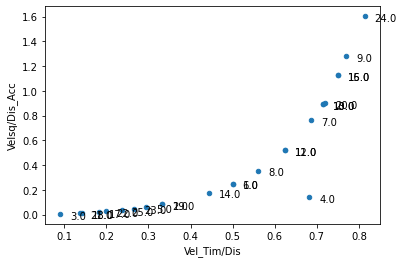

In [50]:
ax = df.plot(kind='scatter', x='Vel_Tim/Dis', y='Velsq/Dis_Acc')
for idx, row in df.iterrows():
    ax.annotate(row['Test'], (row['Vel_Tim/Dis'], row['Velsq/Dis_Acc']),xytext=(10,-5), textcoords='offset points')

***
### Filtered Data

In [32]:
df_filtered = df[(df.Diff < upper_limit) & (df.Diff > lower_limit)]
#df_filtered

Text(0.5, 1.0, 'y=8.691x^3 + -7.097x^2 + 2.166x + -0.175')

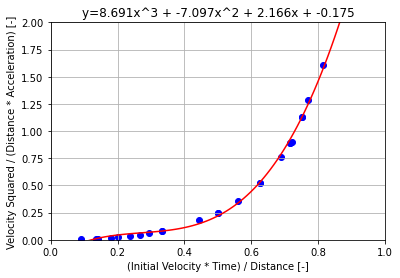

In [33]:
plt.scatter(df_filtered["Vel_Tim/Dis"], df_filtered["Velsq/Dis_Acc"], c='blue', marker='o')
plt.xlabel("(Initial Velocity * Time) / Distance [-]")
plt.ylabel("Velocity Squared / (Distance * Acceleration) [-]")
plt.xlim([0, 1])
plt.ylim([0, 2])
plt.grid()

trendline = numpy.poly1d(numpy.polyfit(df_filtered["Vel_Tim/Dis"], df_filtered["Velsq/Dis_Acc"], 3))
abscisa = numpy.linspace(0, 1.0, 100)

plt.plot(abscisa, trendline(abscisa), color='red')
plt.title("y=%.3fx^3 + %.3fx^2 + %.3fx + %.3f"%(trendline[3],trendline[2],trendline[1], trendline[0])) 

**What acceleration is required to go 4,800 meters in 200 seconds if the initial car velocity is 8 meters per second?**<br>
On the abscissa:<br>
( 8 m/s*200 s ) / 4800 m = 0.33<br><br>
Reading from the graph:<br>
v0^2 /( da ) = 0.075<br><br>
Solving for acceleration:<br>
a = 8 m/s^2 / ( 0.075 * 4800 m ) = 0.18 m/s^2